<a href="https://colab.research.google.com/github/puneat/Audio_Sentiment/blob/master/paper_female.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [6]:
# Keras
import keras
from keras import regularizers
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential, Model, model_from_json
from keras.layers import Dense, Embedding, LSTM, Reshape
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.utils import np_utils, to_categorical
from keras.callbacks import (EarlyStopping, LearningRateScheduler,
                             ModelCheckpoint, TensorBoard, ReduceLROnPlateau)
from keras import losses, models, optimizers
from keras.activations import relu, softmax
from keras.layers import (Convolution2D, AveragePooling2D, BatchNormalization, Flatten, Dropout,
                          GlobalMaxPool2D, MaxPool2D, concatenate, Activation, Input, Dense)

# sklearn
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Other  
from tqdm import tqdm, tqdm_pandas
import scipy
from scipy.stats import skew
import librosa
import librosa.display
import json
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
import seaborn as sns
import glob 
import os
import sys
import IPython.display as ipd  # To play sound in the notebook
import warnings
# ignore warnings 
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [3]:
ref = pd.read_csv("/gdrive/My Drive/Audio_files/Combined_Dataframes/female_df.csv")
ref.head()

,labels,source,path
0,female_fear,TESS,/gdrive/My Drive/Audio_files/female_final/TESS...
1,female_fear,TESS,/gdrive/My Drive/Audio_files/female_final/TESS...
2,female_fear,TESS,/gdrive/My Drive/Audio_files/female_final/TESS...
3,female_fear,TESS,/gdrive/My Drive/Audio_files/female_final/TESS...
4,female_fear,TESS,/gdrive/My Drive/Audio_files/female_final/TESS...


In [4]:
frames=[ref,ref,ref,ref,ref,ref];
df_label=pd.concat(frames);

In [14]:
nclass = 7
inp = Input(shape=(50,259,1))  #2D matrix of 30 MFCC bands by 216 audio length.

X=Reshape((50,259),name='reshape_input')(inp)
X = LSTM(units=125,dropout=0.2,return_sequences=True,activation='relu',stateful=False,input_shape=(50,259))(X)
X=Reshape((50,125,1),name='reshape')(X)  #2D matrix of 30 MFCC bands by 216 audio length.

x = Convolution2D(64, (4,5), padding="same")(inp)
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = MaxPool2D()(x)
# x = Dropout(rate=0.2)(x)
    
x = Convolution2D(64, (4,5), padding="same")(x)
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = MaxPool2D()(x)
# x = Dropout(rate=0.2)(x)
    
x = Convolution2D(64, (4,5), padding="same")(x)
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = MaxPool2D()(x)
# x = Dropout(rate=0.2)(x)
    
x = Convolution2D(64, (4,5), padding="same")(x)
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = MaxPool2D()(x)
# x = Dropout(rate=0.2)(x)
x=AveragePooling2D()(x)    
x = Flatten()(x)
# x = Dense(64)(x)
# # x = Dropout(rate=0.2)(x)
# # x = BatchNormalization()(x)
# x = Activation("relu")(x)
# x = Dropout(rate=0.2)(x)

# x = Dense(64)(x)
# # x = Dropout(rate=0.2)(x)
# # x = BatchNormalization()(x)
# x = Activation("relu")(x)
# x = Dropout(rate=0.2)(x)
    
out = Dense(nclass, activation='softmax')(x)
model = models.Model(inputs=inp, outputs=out)
    
opt = optimizers.Adam(0.001,amsgrad=True)
model.compile(optimizer=opt, loss=losses.categorical_crossentropy, metrics=['accuracy'])

In [8]:
# Split between train and test 
X_train, X_test, y_train, y_test = train_test_split(np.load('/gdrive/My Drive/Audio_files/Combined_Dataframes/female_2d_mfcc_50_aug.npy')
, df_label.labels, test_size=0.20, shuffle=True, random_state=42, stratify=df_label.labels)

# one hot encode the target 
lb = LabelEncoder()
y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

# Normalization as per the standard NN process
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)

X_train = (X_train - mean)/std
X_test = (X_test - mean)/std


In [9]:
del df_label, frames, ref

In [10]:
import numpy as np
from keras import layers
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from keras.models import Model, load_model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
#from resnets_utils import *
from keras.initializers import glorot_uniform
import scipy.misc
from matplotlib.pyplot import imshow
%matplotlib inline

import keras.backend as K
# K.set_image_data_format('channels_last')
# K.set_learning_phase(1)
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import os
from urllib.request import urlopen,urlretrieve
from PIL import Image
from tqdm import tqdm_notebook
%matplotlib inline
from sklearn.utils import shuffle
import cv2
#from resnets_utils import *
import tensorflow as tf
from keras.models import load_model
from sklearn.datasets import load_files   
from keras.utils import np_utils
from glob import glob
from keras import applications
from keras.preprocessing.image import ImageDataGenerator 
from keras import optimizers
from keras.models import Sequential,Model,load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D,GlobalAveragePooling2D,GlobalMaxPooling1D
from keras.layers import Dense, Dropout, Flatten, Conv1D, MaxPool1D,AveragePooling1D,UpSampling1D, Bidirectional
from keras.callbacks import TensorBoard,ReduceLROnPlateau,ModelCheckpoint
import numpy as np 
import pandas as pd
import csv
from pandas import DataFrame
import matplotlib.pyplot as plt
%matplotlib inline 
import matplotlib
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from keras.models import Sequential
from keras import optimizers
from keras.layers import LeakyReLU
from tensorflow.keras import regularizers
import numpy as np
from keras import layers
from keras.layers import Input, Add, Dense, Activation, Conv1D, AveragePooling1D, MaxPooling1D,Reshape,GlobalAveragePooling1D,Dropout
from keras.models import Model, load_model
from keras.utils import plot_model
import keras.backend as K
import tensorflow as tf
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from sklearn.metrics import classification_report
import pickle

In [11]:
import keras.backend.tensorflow_backend as tfback

def _get_available_gpus():  

    if tfback._LOCAL_DEVICES is None:  
        devices = tf.config.list_logical_devices()  
        tfback._LOCAL_DEVICES = [x.name for x in devices]  
    return [x for x in tfback._LOCAL_DEVICES if 'device:gpu' in x.lower()]


tfback._get_available_gpus = _get_available_gpus

In [15]:
model_json = model.to_json()
with open("/gdrive/My Drive/Audio_files/saved_models/json/g_female_2d_gap_cnn_2.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights t o HDF5
# model.save_weights("/gdrive/My Drive/Audio_files/female_cnn_3x3_mfcc50_9552.h5")
# print("Saved model to disk")

In [16]:
model_checkpoint = ModelCheckpoint('/gdrive/My Drive/Audio_files/saved_models/hdf5/g_female_2d_gap_cnn_2.hdf5',save_best_only=True,mode='max' ,monitor='val_accuracy',verbose=1)
history=model.fit(X_train,y_train,epochs=50,batch_size=100,verbose=1,validation_data=(X_test,y_test),shuffle=True,callbacks=[model_checkpoint])

Train on 33739 samples, validate on 8435 samples
Epoch 1/50
33739/33739 [==============================] - 135s 4ms/step - loss: 1.0006 - accuracy: 0.6196 - val_loss: 0.8021 - val_accuracy: 0.6941

Epoch 00001: val_accuracy improved from -inf to 0.69413, saving model to /gdrive/My Drive/Audio_files/saved_models/hdf5/g_female_2d_gap_cnn_2.hdf5
Epoch 2/50
33739/33739 [==============================] - 131s 4ms/step - loss: 0.6198 - accuracy: 0.7734 - val_loss: 0.6957 - val_accuracy: 0.7362

Epoch 00002: val_accuracy improved from 0.69413 to 0.73622, saving model to /gdrive/My Drive/Audio_files/saved_models/hdf5/g_female_2d_gap_cnn_2.hdf5
Epoch 3/50
33739/33739 [==============================] - 131s 4ms/step - loss: 0.4631 - accuracy: 0.8355 - val_loss: 0.6445 - val_accuracy: 0.7640

Epoch 00003: val_accuracy improved from 0.73622 to 0.76396, saving model to /gdrive/My Drive/Audio_files/saved_models/hdf5/g_female_2d_gap_cnn_2.hdf5
Epoch 4/50
33739/33739 [==============================] -

In [ ]:
plot_model(model,show_shapes=True)

In [6]:
# load json and create model
from keras.models import model_from_json
json_file = open('/gdrive/My Drive/Audio_files/saved_models/json/g_female_2d_lstm_cnn_4.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("/gdrive/My Drive/Audio_files/saved_models/hdf5/g_female_2d_lstm_cnn_4.hdf5")
print("Loaded model from disk")

loaded_model.compile(optimizer='adam', loss=losses.categorical_crossentropy,metrics=['accuracy'])
score = loaded_model.evaluate(X_test, y_test, batch_size=1000)
print(score)

Loaded model from disk
8435/8435 [==============================] - 317s 38ms/step
[1.371702972784082, 0.4949614703655243]


In [17]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 50, 259, 1)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 50, 259, 32)       1312      
_________________________________________________________________
batch_normalization_5 (Batch (None, 50, 259, 32)       128       
_________________________________________________________________
activation_7 (Activation)    (None, 50, 259, 32)       0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 25, 129, 32)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 25, 129, 32)       40992     
_________________________________________________________________
batch_normalization_6 (Batch (None, 25, 129, 32)       128 

In [18]:
np.save('/gdrive/My Drive/Audio_files/female_x_train.npy',X_train)
np.save('/gdrive/My Drive/Audio_files/female_y_train.npy',y_train)
np.save('/gdrive/My Drive/Audio_files/female_x_test.npy',X_test)
np.save('/gdrive/My Drive/Audio_files/female_y_test.npy',y_test)

In [ ]:
# model_json = model.to_json()
# with open("/gdrive/My Drive/Audio_files/female_cnn_3x3_mfcc50_9552.json", "w") as json_file:
#     json_file.write(model_json)
# # serialize weights t o HDF5
# model.save_weights("/gdrive/My Drive/Audio_files/female_cnn_3x3_mfcc50_9552.h5")
# print("Saved model to disk")

Saved model to disk


In [24]:
x=model.evaluate(X_test,y_test)
print(x)

8435/8435 [==============================] - 4s 419us/step
[0.2571890177713651, 0.9513930082321167]


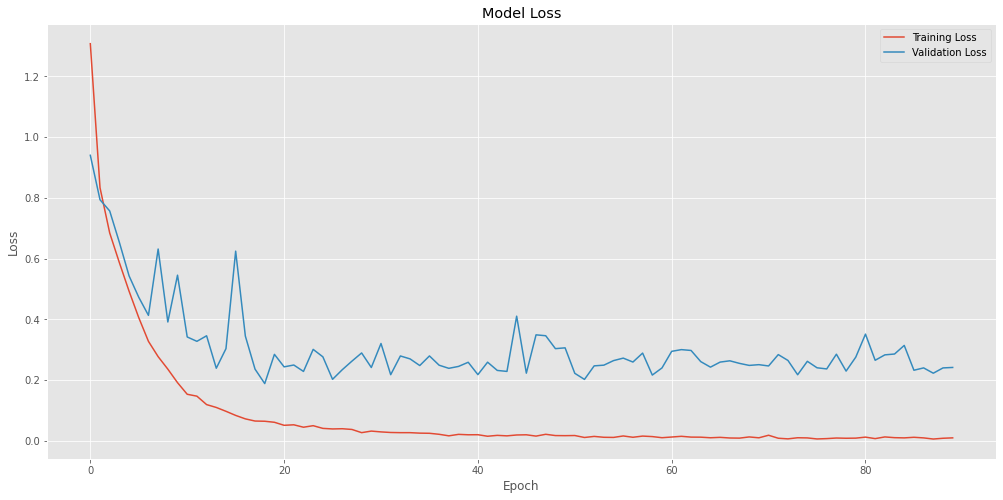

In [13]:
import matplotlib
matplotlib.style.use('ggplot')
plt.gcf().set_size_inches(17, 8, forward=True)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss','Validation Loss'], loc='upper right')
plt.show()

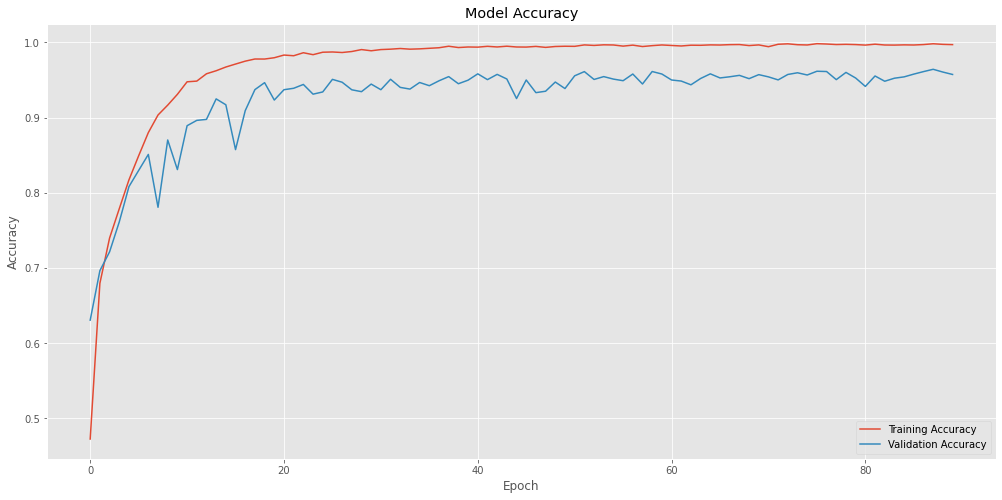

In [14]:
import matplotlib
matplotlib.style.use('ggplot')
plt.gcf().set_size_inches(17, 8, forward=True)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy','Validation Accuracy'], loc='lower right')
plt.show()